In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import string
from nltk.corpus import stopwords
from collections import Counter

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics, feature_extraction, model_selection

In [4]:
data = pd.read_csv('spam.csv', encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns = {"v1":"label", "v2":"content"})

In [6]:
data.describe()

,label,content
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data.groupby("label").describe()

content                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
data['isSpam'] = data["label"].map({"ham": 0, "spam": 1}).astype(int)
data.head()

,label,content,isSpam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B7986E390>,
      dtype=object)

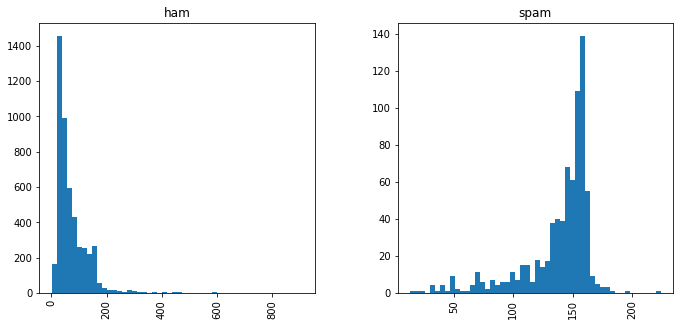

In [17]:
data["length"] = data["content"].apply(len)
data.hist(column = "length", by = "label", bins=50, figsize = (11,5))

Now come to the processing and vectorizing

In [9]:
def text_process(content):
    content = content.translate(str.maketrans('','', string.punctuation))
    content = [word.lower() for word in content.split() if word.lower() not in stopwords.words("english")]
    return content

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vector = CountVectorizer(analyzer=text_process).fit_transform(data["content"])
weight_vector = TfidfTransformer().fit_transform(vector)
weight_vector

<5572x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(weight_vector, data["label"], test_size=0.3, random_state=12)

In [14]:
svc = SVC(kernel = "sigmoid")
svc.fit(features_train, labels_train)
SVCresult = svc.predict(features_test)
from sklearn.metrics import accuracy_score
SVCscore = accuracy_score(labels_test, SVCresult)
SVCscore

0.9683014354066986

In [16]:
bayes = MultinomialNB().fit(features_train, labels_train)
NBresult = bayes.predict(features_test)
NBscore = accuracy_score(labels_test, NBresult)
NBscore

0.9551435406698564

In [21]:
from sklearn.svm import LinearSVC
LSVM = LinearSVC()
LSVM.fit(features_train, labels_train)
LSVMresult = LSVM.predict(features_test)
LSVMscore = accuracy_score(labels_test, LSVMresult)
LSVMscore

0.9706937799043063

In [25]:
svc2 = SVC(kernel = "poly", degree = 3)
svc2.fit(features_train, labels_train)
SVC2result = svc2.predict(features_test)
SVC2score = accuracy_score(labels_test, SVC2result)
SVC2score

0.9270334928229665

In [26]:
svc3 = SVC(kernel = "rbf", gamma = 1)
svc3.fit(features_train, labels_train)
SVC3result = svc3.predict(features_test)
SVC3score = accuracy_score(labels_test, SVC3result)
SVC3score

0.9635167464114832

[]

<Figure size 1080x1080 with 0 Axes>

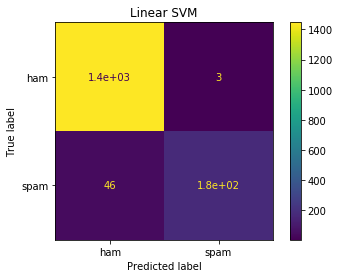

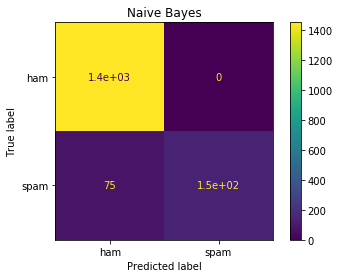

In [31]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(15,15))
disp1 = plot_confusion_matrix(LSVM, features_test, labels_test)
disp2 = plot_confusion_matrix(bayes, features_test, labels_test)
disp1.ax_.set_title("Linear SVM")
disp2.ax_.set_title("Naive Bayes")
plt.plot()

So the result is Linear SVM > Sigmoid SVM > RBF SVM > Naive Bayes > Cubic SVM